In [3]:
%% Initialization
clear ; close all; clc

%% ================= Part 1: Find Closest Centroids ====================
%  To help you implement K-Means, we have divided the learning algorithm 
%  into two functions -- findClosestCentroids and computeCentroids. In this
%  part, you should complete the code in the findClosestCentroids function. 
%
fprintf('Finding closest centroids.\n\n');

% Load an example dataset that we will be using
load('ex7data2.mat');

% Select an initial set of centroids
K = 3; % 3 Centroids
initial_centroids = [3 3; 6 2; 8 5];

% Find the closest centroids for the examples using the
% initial_centroids
idx = findClosestCentroids(X, initial_centroids);

fprintf('Closest centroids for the first 3 examples: \n')
fprintf(' %d', idx(1:3));
fprintf('\n(the closest centroids should be 1, 3, 2 respectively)\n');



Finding closest centroids.

Closest centroids for the first 3 examples: 
 1 3 2

(the closest centroids should be 1, 3, 2 respectively)


In [7]:
%% ===================== Part 2: Compute Means =========================
%  After implementing the closest centroids function, you should now
%  complete the computeCentroids function.
%
fprintf('\nComputing centroids means.\n\n');

%  Compute means based on the closest centroids found in the previous part.
centroids = computeCentroids(X, idx, K);

fprintf('Centroids computed after initial finding of closest centroids: \n')
fprintf(' %f %f \n' , centroids');
fprintf('\n(the centroids should be\n');
fprintf('   [ 2.428301 3.157924 ]\n');
fprintf('   [ 5.813503 2.633656 ]\n');
fprintf('   [ 7.119387 3.616684 ]\n\n');


Computing centroids means.

Centroids computed after initial finding of closest centroids: 
 2.428301 3.157924 
 5.813503 2.633656 
 7.119387 3.616684 

(the centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]




Running K-Means clustering on example dataset.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...

K-Means Done.



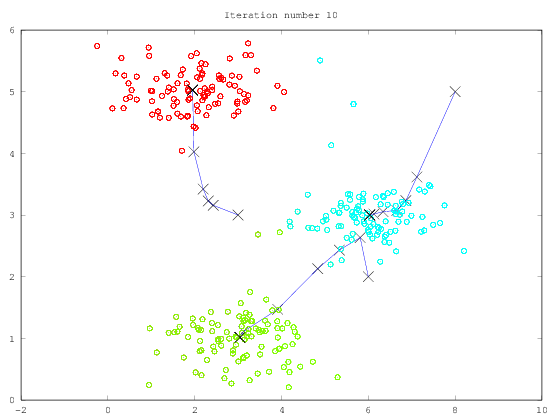

In [10]:
%% =================== Part 3: K-Means Clustering ======================
%  After you have completed the two functions computeCentroids and
%  findClosestCentroids, you have all the necessary pieces to run the
%  kMeans algorithm. In this part, you will run the K-Means algorithm on
%  the example dataset we have provided. 
%
fprintf('\nRunning K-Means clustering on example dataset.\n\n');

% Load an example dataset
load('ex7data2.mat');

% Settings for running K-Means
K = 3;
max_iters = 10;

% For consistency, here we set centroids to specific values
% but in practice you want to generate them automatically, such as by
% settings them to be random examples (as can be seen in
% kMeansInitCentroids).
initial_centroids = [3 3; 6 2; 8 5];

% Run K-Means algorithm. The 'true' at the end tells our function to plot
% the progress of K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters, true);
fprintf('\nK-Means Done.\n\n');

In [35]:
fprintf('\nRunning K-Means clustering on pixels from an image.\n\n');

%  Load an image of a bird
A = double(imread('bird_small.png'));

% If imread does not work for you, you can try instead
%   load ('bird_small.mat');

A = A / 255; % Divide by 255 so that all values are in the range 0 - 1

% Size of the image
img_size = size(A);

% Reshape the image into an Nx3 matrix where N = number of pixels.
% Each row will contain the Red, Green and Blue pixel values
% This gives us our dataset matrix X that we will use K-Means on.
X = reshape(A, img_size(1) * img_size(2), 3);

% Run your K-Means algorithm on this data
% You should try different values of K and max_iters here
K = 16; 
max_iters = 10;

% When using K-Means, it is important the initialize the centroids
% randomly. 
% You should complete the code in kMeansInitCentroids.m before proceeding
initial_centroids = kMeansInitCentroids(X, K);

% Run K-Means
[centroids, idx] = runkMeans(X, initial_centroids, max_iters);


Running K-Means clustering on pixels from an image.

K-Means iteration 1/10...
K-Means iteration 2/10...
K-Means iteration 3/10...
K-Means iteration 4/10...
K-Means iteration 5/10...
K-Means iteration 6/10...
K-Means iteration 7/10...
K-Means iteration 8/10...
K-Means iteration 9/10...
K-Means iteration 10/10...



Applying K-Means to compress an image.



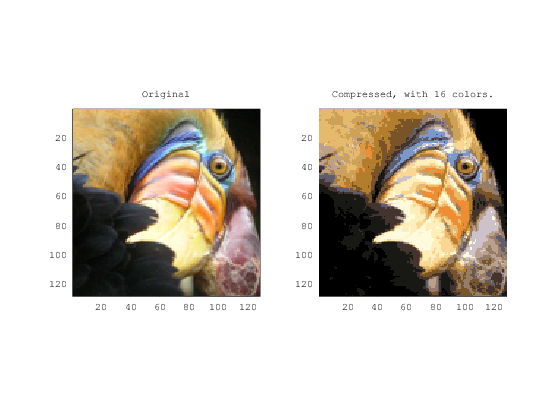

In [36]:
%% ================= Part 5: Image Compression ======================
%  In this part of the exercise, you will use the clusters of K-Means to
%  compress an image. To do this, we first find the closest clusters for
%  each example. After that, we 

fprintf('\nApplying K-Means to compress an image.\n\n');

% Find closest cluster members
idx = findClosestCentroids(X, centroids);

% Essentially, now we have represented the image X as in terms of the
% indices in idx. 

% We can now recover the image from the indices (idx) by mapping each pixel
% (specified by its index in idx) to the centroid value
X_recovered = centroids(idx,:);

% Reshape the recovered image into proper dimensions
X_recovered = reshape(X_recovered, img_size(1), img_size(2), 3);

% Display the original image 
subplot(1, 2, 1);
imagesc(A); 
title('Original');

% Display compressed image side by side
subplot(1, 2, 2);
imagesc(X_recovered)
title(sprintf('Compressed, with %d colors.', K));